In [1]:
import pandas as pd
import numpy as np

In [10]:
fao = pd.read_csv('../data/FAOSTAT_data_8-28-2020.csv', low_memory=False)
wfp = pd.read_csv('../data/wfpvam_foodprices.csv', low_memory=False)

In [15]:
fao.sample(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
22917,PP,Producer Prices,33,Canada,5532,Producer Price (USD/tonne),267,Sunflower seed,2004,2004,7021,Annual value,USD,241.3,NaN,Official data
134448,PP,Producer Prices,222,Tunisia,5532,Producer Price (USD/tonne),568,"Melons, other (inc.cantaloupes)",2014,2014,7021,Annual value,USD,296.9,NaN,Official data
88228,PP,Producer Prices,144,Mozambique,5532,Producer Price (USD/tonne),27,"Rice, paddy",2003,2003,7021,Annual value,USD,84.1,NaN,Official data
104123,PP,Producer Prices,173,Poland,5532,Producer Price (USD/tonne),1062,"Eggs, hen, in shell",2005,2005,7021,Annual value,USD,1011.5,NaN,Official data
15005,PP,Producer Prices,19,Bolivia (Plurinational State of),5532,Producer Price (USD/tonne),358,Cabbages and other brassicas,2009,2009,7021,Annual value,USD,142.4,NaN,Official data


In [48]:
fao.Item.value_counts()[:10]

Tomatoes                        2859
Maize                           2755
Potatoes                        2737
Eggs, hen, in shell             2736
Milk, whole fresh cow           2682
Meat live weight, cattle        2625
Meat live weight, chicken       2494
Cabbages and other brassicas    2394
Meat, cattle                    2315
Onions, dry                     2282
Name: Item, dtype: int64

In [6]:
food_avgs = wfp.groupby(['cm_name', 'mp_year'])['mp_price'].mean().unstack()

In [7]:
food_avgs.describe()

mp_year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,3.000000,3.000000,4.000000,4.000000,10.000000,12.000000,16.000000,17.000000,21.000000,21.000000,...,3.050000e+02,3.560000e+02,3.940000e+02,4.280000e+02,4.640000e+02,4.380000e+02,4.530000e+02,4.770000e+02,4.890000e+02,6.860000e+02
mean,108.648870,110.986408,83.327626,81.113417,70.184455,194.786743,304.387529,43049.442326,33828.693594,29926.688859,...,2.166988e+04,2.931703e+04,2.773986e+04,2.596866e+04,1.859602e+04,2.100593e+04,1.183745e+04,1.552961e+04,1.509468e+04,1.241542e+04
std,80.395104,67.566057,81.709494,83.226532,82.372694,364.319453,526.061464,144777.649348,130079.939218,113533.083289,...,3.150272e+05,3.498963e+05,3.418829e+05,3.383417e+05,2.005981e+05,2.214975e+05,1.029830e+05,1.487983e+05,1.231499e+05,8.798828e+04
min,58.695652,69.988636,1.527500,1.555000,1.322667,1.332500,1.688333,1.773333,1.110000,1.695000,...,1.600000e-01,4.370833e-01,2.664304e-01,4.512140e-01,4.524306e-01,2.485333e-01,1.700000e-01,2.316200e-01,2.422381e-01,1.866667e-01
25%,62.278861,71.994318,46.827188,44.567321,9.450700,5.094026,8.634119,9.633649,8.320890,8.404911,...,3.050000e+01,5.082443e+01,4.842211e+01,4.421568e+01,4.718272e+01,4.836250e+01,4.769313e+01,5.906708e+01,7.644073e+01,1.252021e+02
50%,65.862069,74.000000,67.697057,62.324334,51.549668,75.625643,111.487939,160.506024,171.372093,170.000000,...,2.316310e+02,3.987898e+02,4.430582e+02,4.604909e+02,4.261464e+02,3.647831e+02,3.478150e+02,3.982944e+02,5.263739e+02,7.650271e+02
75%,133.625479,131.485294,104.197496,98.870430,73.387636,118.528898,170.299842,1853.018868,1380.733333,1253.000000,...,1.341221e+03,1.800342e+03,2.050629e+03,2.919290e+03,2.451725e+03,2.293162e+03,2.419247e+03,2.583303e+03,3.013472e+03,3.400473e+03
max,201.388889,188.970588,196.388889,198.250000,255.763889,1225.000000,1668.098765,590833.500000,592625.000000,516000.000000,...,5.500053e+06,6.206308e+06,6.504234e+06,6.731328e+06,3.475853e+06,3.453254e+06,2.027340e+06,3.003641e+06,2.268161e+06,1.506778e+06


In [8]:
food_avgs

mp_year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
cm_name,,,,,,,,,,,,,,,,,,,,,
Apples (dried) - Retail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,113.988323,97.515655,106.158624,92.575341
Apples (red) - Retail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1791.146808,1519.155853,1839.837244,1961.511506,208.911555,94.947662,141.168070,124.209620,127.187936
Apples (red) - Wholesale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3028.583333,3217.440191,3088.000000,NaN,NaN,NaN,NaN,NaN
Apples - Retail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.530270,45.282934,53.651050,59.909505,116.962377,147.081720,51.959800,222.107711,245.675515,817.156794
Apples - Wholesale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yam - Retail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,441.333333,356.916667,324.761905,263.916609,237.552281,328.764522,387.919561,424.400385,418.571140,334.122590
Yam - Wholesale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164.618582,230.938807,267.910131,5518.718043,11161.964962,14276.705907,8091.539848,3299.133205,5521.632374,17874.193538
Yeast - Retail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1993.664122,NaN,NaN,NaN,NaN


In [9]:
wfp

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.00,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.00,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.00,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.00,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530729,271.0,Zimbabwe,3444,Midlands,2185,Vhugwi,497,"Sugar (white, fortified) - Retail",0.0,USD,15,Retail,5,KG,9,2017,1.50,NaN
1530730,271.0,Zimbabwe,3444,Midlands,2187,Murowa,50,Beans - Retail,0.0,USD,15,Retail,5,KG,3,2018,2.80,NaN
1530731,271.0,Zimbabwe,3444,Midlands,2187,Murowa,51,Maize - Retail,0.0,USD,15,Retail,5,KG,3,2018,0.40,NaN
1530732,271.0,Zimbabwe,3444,Midlands,2187,Murowa,96,Oil (vegetable) - Retail,0.0,USD,15,Retail,15,L,3,2018,2.35,NaN


In [21]:
def fao_global_averages(data, food):
    '''
    take the FAO food prices table and a specific food
    return a Series representing the average global price per year
    '''
    prices = data[data.Item == food]
    return prices.groupby('Year').Value.mean()    

In [52]:
toms_avg = fao_global_averages(fao, 'Tomatoes')
maize_avg = fao_global_averages(fao, 'Maize')
pots_avg = fao_global_averages(fao, 'Potatoes')
milk_avg = fao_global_averages(fao, 'Milk, whole fresh cow')
beef_avg = fao_global_averages(fao, 'Meat live weight, cattle')

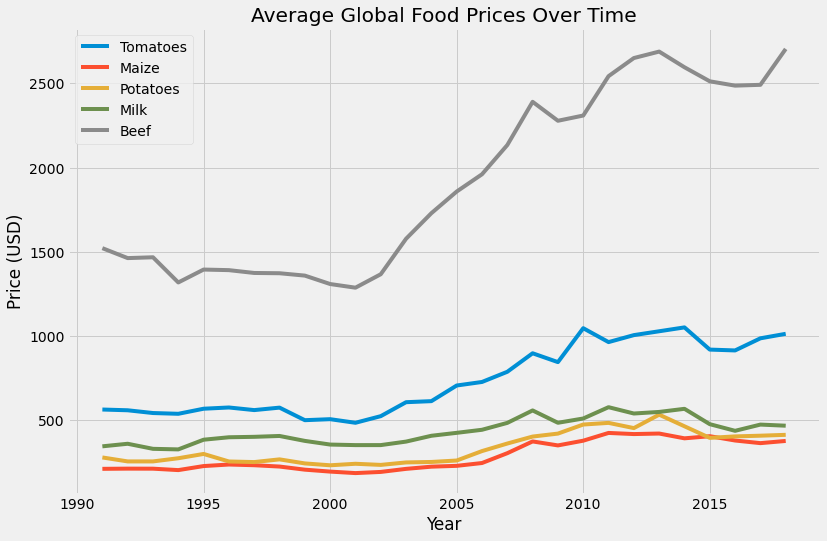

In [53]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(toms_avg, label='Tomatoes')
ax.plot(maize_avg, label='Maize')
ax.plot(pots_avg, label='Potatoes')
ax.plot(milk_avg, label='Milk')
ax.plot(beef_avg, label='Beef')
ax.set_title('Average Global Food Prices Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD)')
ax.legend()

plt.savefig('../src/figures/prices_over_time.png')